In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
df=pd.DataFrame()

In [19]:
df1 = pd.read_csv('/content/Avg_year - Copy.csv', parse_dates=True)
df1.index.freq = 'MS'
df2 = pd.read_csv('/content/Extreme_Summer_data.csv', parse_dates=True)
df2.index.freq = 'MS'

In [20]:
df1.tail()

,Time,Qdot_Storage_out
52556,31533600,181826.1113
52557,31534200,182853.7405
52558,31534800,183879.7926
52559,31535400,184904.4514
52560,31536000,182381.6265


In [21]:
df2.tail()

,Time,Qdot_Storage_out
52556,3.1534e+07 sec,111988.720055
52557,3.1534e+07 sec,112568.668598
52558,3.1535e+07 sec,113126.051370
52559,3.1535e+07 sec,113677.533769
52560,3.1536e+07 sec,86861.378259


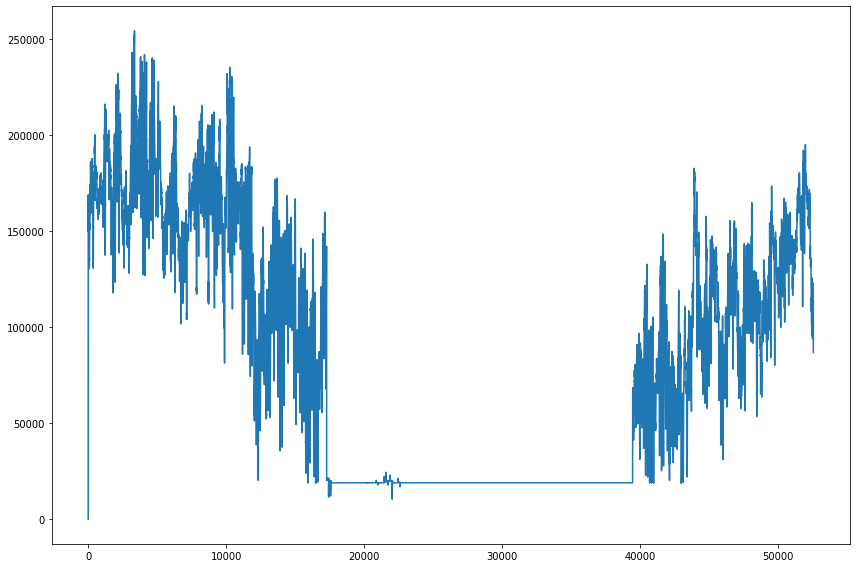

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
#df1.columns = ['Qdot_storage_out']
#df1.plot(figsize=(12,8))
df2['Qdot_Storage_out'].plot(figsize=(12,8))
#df2.columns.plot(figsize=(12,8))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52561 entries, 0 to 52560
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              52561 non-null  int64  
 1   Qdot_Storage_out  52561 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 821.4 KB


In [ ]:
df2.corr()

,Time,Qdot_Storage_out
Time,1.000000,-0.356213
Qdot_Storage_out,-0.356213,1.000000


In [ ]:
df1_input=df1[['Qdot_Storage_out','T_sup','sensor_temperature','Temperature_Sky_Radiation','Sum_Qdot_h_total',  
             'Temperature_Ambient']]
df2_input=df2[['Qdot_Storage_out','T_sup','sensor_temperature','Temperature_Sky_Radiation','Sum_Qdot_h_total',
             'Temperature_Ambient']]

In [ ]:
df1_input

NameError: ignored

In [ ]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df1)
data_scaled_test=scaler.fit_transform(df2)
data_scaled

NameError: ignored

In [ ]:
df1_input['T_sup']=df1.T_sup.shift(+144)
df1_input

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Qdot_Storage_out,T_sup,sensor_temperature,Temperature_Sky_Radiation,Sum_Qdot_h_total,Temperature_Ambient
Time,,,,,,
0,0.0000,NaN,100.000000,-15.000000,173204.6450,-2.70
600,161319.2682,NaN,102.566550,-15.000000,173204.8415,-2.70
1200,205039.3445,NaN,105.154589,-15.000000,173205.0379,-2.70
1800,201277.9101,NaN,106.291133,-15.000000,173205.2342,-2.70
2400,196044.7495,NaN,106.559546,-15.000000,173205.4306,-2.70
...,...,...,...,...,...,...
31533600,181826.1113,109.456983,110.658728,-9.266667,161077.0602,-1.20
31534200,182853.7405,109.449993,110.652261,-9.850000,162123.7366,-1.35
31534800,183879.7926,109.445687,110.645217,-10.433333,163170.4131,-1.50


In [23]:
df1['Qdot_Lastday']=df1['Qdot_Storage_out'].shift(+144)
df1['Qdot_2daysback']=df1['Qdot_Storage_out'].shift(+288)
df1['Qdot_3daysback']=df1['Qdot_Storage_out'].shift(+432)
df1['Qdot_4daysback']=df1['Qdot_Storage_out'].shift(+576)
df1['Qdot_5daysback']=df1['Qdot_Storage_out'].shift(+720)
df1

,Time,Qdot_Storage_out,Qdot_Lastday,Qdot_2daysback,Qdot_3daysback,Qdot_4daysback,Qdot_5daysback
0,0,0.0000,NaN,NaN,NaN,NaN,NaN
1,600,161319.2682,NaN,NaN,NaN,NaN,NaN
2,1200,205039.3445,NaN,NaN,NaN,NaN,NaN
3,1800,201277.9101,NaN,NaN,NaN,NaN,NaN
4,2400,196044.7495,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
52556,31533600,181826.1113,186298.6752,178508.8836,148546.3565,200806.0950,189045.5862
52557,31534200,182853.7405,185991.8945,178669.4991,148662.1188,198573.1592,189284.5378
52558,31534800,183879.7926,185682.5873,178831.4629,148768.8237,196334.4682,189529.5233
52559,31535400,184904.4514,185361.5515,178967.6616,148879.2097,194077.3672,189768.6064


In [24]:
df2['Qdot_lastday']=df2['Qdot_Storage_out'].shift(+144)
df2['Qdot_2nddayback']=df2['Qdot_Storage_out'].shift(+288)
df2['Qdot_3rddayback']=df2['Qdot_Storage_out'].shift(+432)
df2['Qdot_4thdayback']=df2['Qdot_Storage_out'].shift(+576)
df2['Qdot_5thdayback']=df2['Qdot_Storage_out'].shift(+720)
df2

,Time,Qdot_Storage_out,Qdot_lastday,Qdot_2nddayback,Qdot_3rddayback,Qdot_4thdayback,Qdot_5thdayback
0,0 sec,0.000000,NaN,NaN,NaN,NaN,NaN
1,600 sec,127141.164962,NaN,NaN,NaN,NaN,NaN
2,1200 sec,169058.330419,NaN,NaN,NaN,NaN,NaN
3,1800 sec,165878.617237,NaN,NaN,NaN,NaN,NaN
4,2400 sec,160474.548726,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
52556,3.1534e+07 sec,111988.720055,118173.830801,170849.876863,166097.285808,186832.556063,178005.229445
52557,3.1534e+07 sec,112568.668598,117946.746716,171174.963544,165982.832811,186683.577715,178443.684626
52558,3.1535e+07 sec,113126.051370,117711.497118,171493.991886,165868.226333,186526.874332,178855.147605
52559,3.1535e+07 sec,113677.533769,117475.883485,171821.978251,165754.233017,186388.438916,179278.013877


In [25]:
df1=df1.dropna()
df1

,Time,Qdot_Storage_out,Qdot_Lastday,Qdot_2daysback,Qdot_3daysback,Qdot_4daysback,Qdot_5daysback
720,432000,93890.55276,129426.8522,148332.4932,118031.4968,158658.6640,0.0000
721,432600,104976.15110,132420.8917,155132.1712,130354.6805,153637.8076,161319.2682
722,433200,105116.96050,133095.5289,155659.9237,129367.5440,153201.1828,205039.3445
723,433800,104890.79720,132779.5430,156422.2608,128964.7713,152737.8163,201277.9101
724,434400,105284.87210,132306.1095,157351.5763,129591.8858,152207.9644,196044.7495
...,...,...,...,...,...,...,...
52556,31533600,181826.11130,186298.6752,178508.8836,148546.3565,200806.0950,189045.5862
52557,31534200,182853.74050,185991.8945,178669.4991,148662.1188,198573.1592,189284.5378
52558,31534800,183879.79260,185682.5873,178831.4629,148768.8237,196334.4682,189529.5233
52559,31535400,184904.45140,185361.5515,178967.6616,148879.2097,194077.3672,189768.6064


In [26]:
df2=df2.dropna()
df2

,Time,Qdot_Storage_out,Qdot_lastday,Qdot_2nddayback,Qdot_3rddayback,Qdot_4thdayback,Qdot_5thdayback
720,4.32e+05 sec,156328.872128,184071.231745,178056.058209,187908.932575,158979.820298,0.000000
721,4.326e+05 sec,163889.344329,181332.027111,177806.167226,168043.380269,166976.942643,127141.164962
722,4.332e+05 sec,163918.207400,181434.175041,178607.667229,168866.867629,166185.344235,169058.330419
723,4.338e+05 sec,164875.570905,180274.985993,179990.351623,167076.552524,166459.230195,165878.617237
724,4.344e+05 sec,166035.739132,179193.893060,181360.117479,165026.112671,167082.369088,160474.548726
...,...,...,...,...,...,...,...
52556,3.1534e+07 sec,111988.720055,118173.830801,170849.876863,166097.285808,186832.556063,178005.229445
52557,3.1534e+07 sec,112568.668598,117946.746716,171174.963544,165982.832811,186683.577715,178443.684626
52558,3.1535e+07 sec,113126.051370,117711.497118,171493.991886,165868.226333,186526.874332,178855.147605
52559,3.1535e+07 sec,113677.533769,117475.883485,171821.978251,165754.233017,186388.438916,179278.013877


In [27]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [28]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=5, random_state=1)

In [29]:
import numpy as np
x1,x2,x3,x4,x5,y1=df1['Qdot_Lastday'],df1['Qdot_2daysback'],df1['Qdot_3daysback'],df1['Qdot_4daysback'],df1['Qdot_5daysback'],df1['Qdot_Storage_out']
x1,x2,x3,x4,x5,y1=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(y1)
x1,x2,x3,x4,x5,y1=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1), x4.reshape(-1,1),x5.reshape(-1,1),y1.reshape(-1,1)
final_x1=np.concatenate((x1,x2,x3,x4,x5),axis=1)
print(final_x1)

[[129426.8522 148332.4932 118031.4968 158658.664       0.    ]
 [132420.8917 155132.1712 130354.6805 153637.8076 161319.2682]
 [133095.5289 155659.9237 129367.544  153201.1828 205039.3445]
 ...
 [185682.5873 178831.4629 148768.8237 196334.4682 189529.5233]
 [185361.5515 178967.6616 148879.2097 194077.3672 189768.6064]
 [195762.9369 197178.9048 104053.7461 202411.8215 191231.7004]]


In [30]:
import numpy as np
x1,x2,x3,x4,x5,y2=df2['Qdot_lastday'],df2['Qdot_2nddayback'],df2['Qdot_3rddayback'],df2['Qdot_4thdayback'],df2['Qdot_5thdayback'],df2['Qdot_Storage_out']
x1,x2,x3,x4,x5,y2=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(y2)
x1,x2,x3,x4,x5,y2=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1), x4.reshape(-1,1),x5.reshape(-1,1),y2.reshape(-1,1)
final_x2=np.concatenate((x1,x2,x3,x4,x5),axis=1)
print(final_x2)

[[184071.23174459 178056.05820902 187908.93257494 158979.82029843
       0.        ]
 [181332.02711082 177806.16722571 168043.38026911 166976.94264285
  127141.16496176]
 [181434.17504148 178607.66722892 168866.8676295  166185.34423501
  169058.33041891]
 ...
 [117711.49711792 171493.99188646 165868.22633331 186526.87433246
  178855.14760505]
 [117475.88348537 171821.97825119 165754.23301653 186388.43891577
  179278.01387708]
 [108355.44179257 156680.95133782 161557.75195505 195228.7515958
  192236.28884408]]


In [31]:
X_train,X_test,y_train,y_test=final_x1[:,:],final_x2[:,:],y1[:,:],y2[:,:]

In [ ]:
x2=sm.add_constant(X_train)

In [ ]:
x2

array([[1.00000000e+00, 1.29426852e+05, 1.48332493e+05, 1.18031497e+05,
        1.58658664e+05, 0.00000000e+00],
       [1.00000000e+00, 1.32420892e+05, 1.55132171e+05, 1.30354681e+05,
        1.53637808e+05, 1.61319268e+05],
       [1.00000000e+00, 1.33095529e+05, 1.55659924e+05, 1.29367544e+05,
        1.53201183e+05, 2.05039345e+05],
       ...,
       [1.00000000e+00, 1.85682587e+05, 1.78831463e+05, 1.48768824e+05,
        1.96334468e+05, 1.89529523e+05],
       [1.00000000e+00, 1.85361552e+05, 1.78967662e+05, 1.48879210e+05,
        1.94077367e+05, 1.89768606e+05],
       [1.00000000e+00, 1.95762937e+05, 1.97178905e+05, 1.04053746e+05,
        2.02411821e+05, 1.91231700e+05]])

In [ ]:
est=sm.OLS(y_train,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.265e+05
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:47:36   Log-Likelihood:            -5.7914e+05
No. Observations:               51841   AIC:                         1.158e+06
Df Residuals:                   51835   BIC:                         1.158e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1901.2228    126.796     14.994      0.0

In [32]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression()

In [ ]:
df_train = pd.DataFrame(y_train[50000:], columns=['y_train'])
df_train

,y_train
0,166228.3108
1,166322.8639
2,166410.7763
3,166513.8152
4,166629.3727
...,...
1836,181826.1113
1837,182853.7405
1838,183879.7926
1839,184904.4514


,y_train
y_train,1.0


Text(0.5, 0, 'Actual Qdot values')

Text(0, 0.5, 'Predicted Qdot values')

Text(0.5, 1.0, 'Actual Qdot values vs Predicted Qdot values')

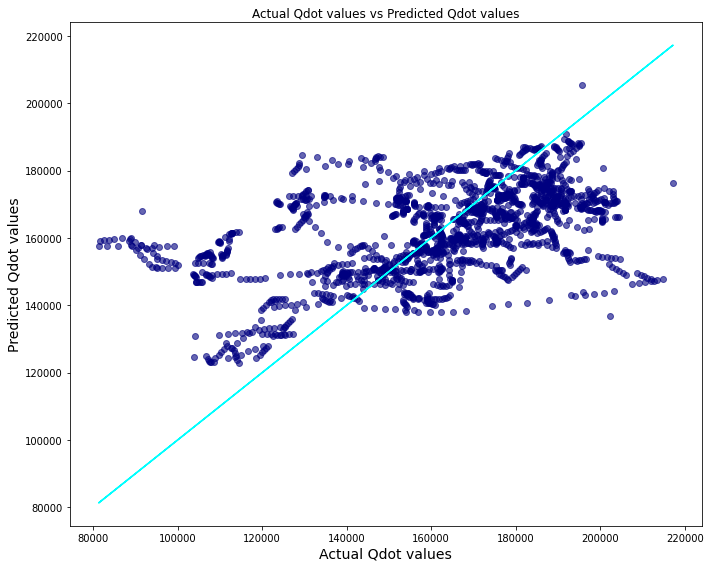

Text(0.5, 0, 'Predicted Qdot values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs Fitted Values')

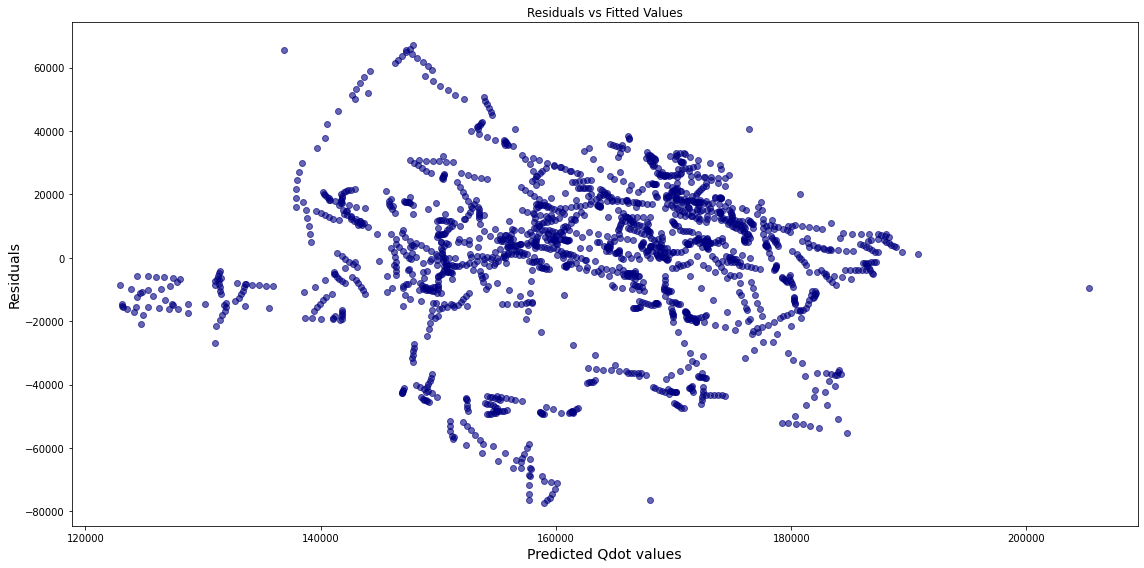

In [ ]:
x_incl_const=sm.add_constant(X_train[50000:])
model=sm.OLS(y_train[50000:],x_incl_const)
results=model.fit()
residuals=y_train-results.fittedvalues
df_train = pd.DataFrame(y_train, columns=['y_train'])
corr=df_train.corr(method='pearson', min_periods=1)
corr
plt.scatter(x=y_train[50000:], y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train[50000:], y_train[50000:], c='cyan')

plt.xlabel('Actual Qdot values', fontsize=14)
plt.ylabel('Predicted Qdot values', fontsize=14)
plt.title('Actual Qdot values vs Predicted Qdot values')
plt.rcParams["figure.figsize"] = (16,8)
plt.show()
#Residuals vs Predicted Values
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted Qdot values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values')
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

In [ ]:
df_results=pd.DataFrame(results.fittedvalues, columns=['Fitted_Values'])
df_results

,Fitted_Values
0,171317.553811
1,171317.805765
2,171318.057630
3,171318.309405
4,170591.250850
...,...
2556,181164.715756
2557,182184.078151
2558,183203.440636
2559,184222.803030


In [ ]:
frames = [df_train, df_results]
result = pd.concat(frames, axis=1, join='inner')
corr=result.corr()
corr

,y_train,Fitted_Values
y_train,1.000000,0.993111
Fitted_Values,0.993111,1.000000


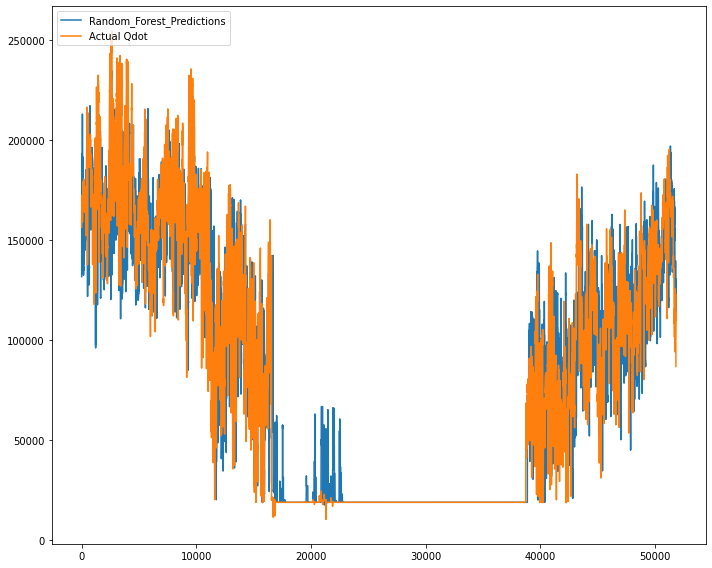

In [33]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.autolayout"] = True
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Qdot')
#plt.savefig(csv_file.split('.csv')[0] + '.png')
plt.legend(loc="upper left")
plt.show()
#plt.xlim([40752,41616])
#print(left, right)

In [ ]:
a=y_test[52000:]
b=pred[52000:]
c=a.ravel()
d=b.ravel()
c.shape
d.shape

(0,)

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value': c,'Predicted Value':d,'Difference':c-d})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference


LinearRegression()


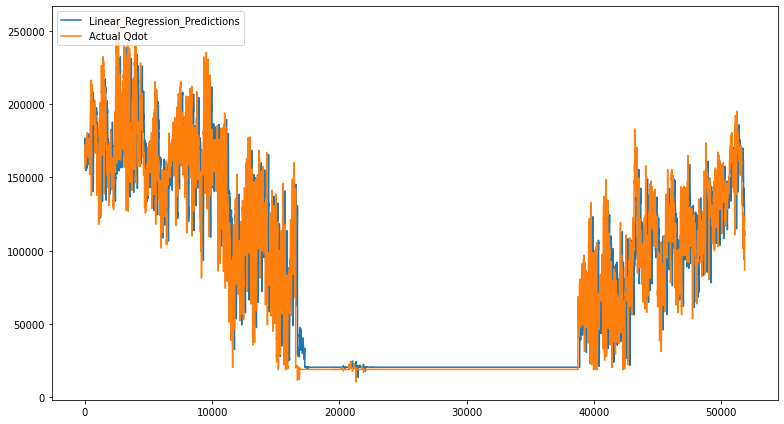

In [34]:
lin_pred=lin_model.predict(X_test)
print(lin_model)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Qdot')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test[2016:6480]

array([[178039.919 ],
       [168745.1877],
       [168725.7029],
       ...,
       [149114.4398],
       [149669.4466],
       [150229.2072]])

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred[39312:43776],y_test[39312:43776]))
rmse_lr=sqrt(mean_squared_error(lin_pred[39312:43776],y_test[39312:43776]))
mae_rf=mean_absolute_error(pred[39312:43776],y_test[39312:43776])
mae_lr=mean_absolute_error(lin_pred[39312:43776], y_test[39312:43776])

In [38]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)
print('Mean Absolute Error for Random Forest Model is:',mae_rf)
print('Mean Absolute Error for Linear Regression Model is:',mae_lr)

Mean Squared Error for Random Forest Model is: 26684.974638762844
Mean Squared Error for Linear Regression Model is: 22352.899863690865
Mean Absolute Error for Random Forest Model is: 21181.397224406155
Mean Absolute Error for Linear Regression Model is: 17039.39267744337
